In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load dataset
california = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Check for missing values
print(df.isnull().sum())  # No missing values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('MedHouseVal', axis=1))
y = df['MedHouseVal']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [3]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

# Create results dictionary
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}


                        MSE       MAE        R²
Random Forest      0.255498  0.327613  0.805024
Gradient Boosting  0.293999  0.371650  0.775643
SVR                0.355198  0.397763  0.728941
Decision Tree      0.494272  0.453784  0.622811
Linear Regression  0.555892  0.533200  0.575788


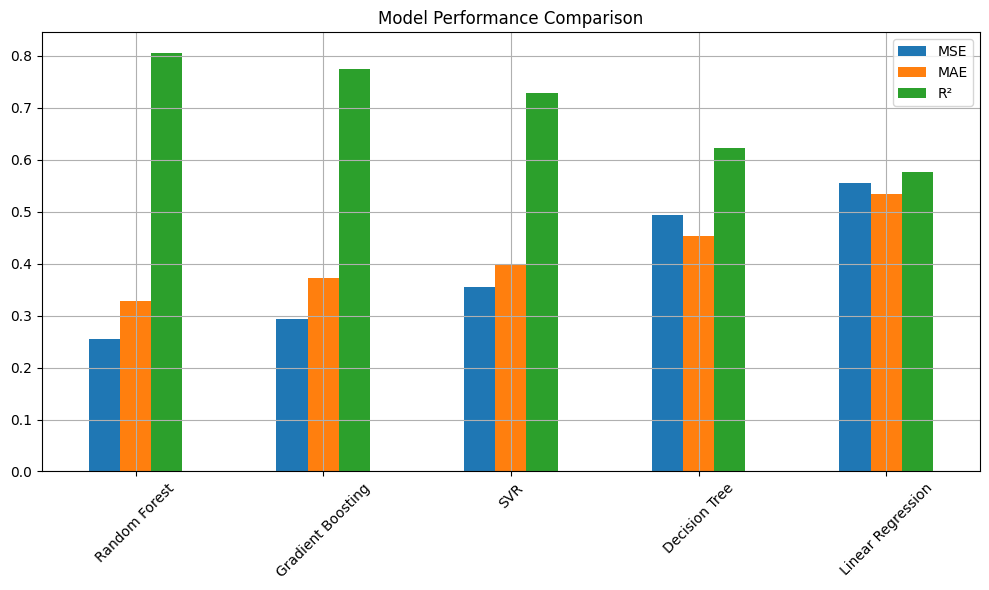

In [4]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)
print(results_df)

# Visualize comparison
results_df.plot(kind='bar', figsize=(10,6), title="Model Performance Comparison")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
